In [1]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from collections import Counter
import seaborn as sns 
from matplotlib.ticker import StrMethodFormatter

#data = pd.read_csv('listings.csv.gz', nrows=1000, compression='gzip', error_bad_lines=False)
#data.head()

data_complete = pd.read_csv('SF_listings.csv')

data_complete.fillna(0, inplace=True)

price = data_complete['price']
prices=[]

for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

data_complete['price']=prices

In [2]:


data_complete = pd.DataFrame(data_complete)
data_complete

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20181206023014,2018-12-06,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1.51
1,5858,https://www.airbnb.com/rooms/5858,20181206023014,2018-12-06,Creative Sanctuary,0,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,0.96
2,7918,https://www.airbnb.com/rooms/7918,20181206023014,2018-12-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
3,8142,https://www.airbnb.com/rooms/8142,20181206023014,2018-12-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,0,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
4,8339,https://www.airbnb.com/rooms/8339,20181206023014,2018-12-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,0,...,t,STR-0000264,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,t,t,2,0.24
5,8567,https://www.airbnb.com/rooms/8567,20181206023014,2018-12-06,Lovely 2BR flat Great Location,0,"Fully furnished 2BR, 1BA flat in beautiful Vic...","Fully furnished 2BR, 1BA flat in beautiful Vic...",none,"The neighborhood is very centrally located, cl...",...,t,STR-0000278,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,0.27
6,8739,https://www.airbnb.com/rooms/8739,20181206023014,2018-12-06,"Mission Sunshine, with Private Bath","Welcome to San Francisco's Mission District, t...","Your sunny room has a queen size bed, and look...","Welcome to San Francisco's Mission District, t...",none,Located between Valencia Street and Dolores Pa...,...,t,STR-0000028,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,2,5.54
7,9225,https://www.airbnb.com/rooms/9225,20181206023014,2018-12-06,Artful Potrero Separate Floor with Garden,A Unique Guest Suite! A Spacious Art Filled ...,"It is unique, very spacious [800 sq. ft. with...",A Unique Guest Suite! A Spacious Art Filled ...,none,"It is a distinct neighborhood, with easy acces...",...,t,STR-0000179,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,3.91
8,10251,https://www.airbnb.com/rooms/10251,20181206023014,2018-12-06,Victorian Suite in Inner Mission,0,Please read this before you book! Second floor...,Please read this before you book! Second floor...,none,"Neighborhood is safe, sunny, lively and fun. ...",...,t,STR-0001558,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,2.73
9,10578,https://www.airbnb.com/rooms/10578,20181206023014,2018-12-06,Classic Nob Hill Studio - Roof Deck,A cute studio with nice street views and lots ...,"Features: Elevator, Wood floors, TV, DVD Play...",A cute studio with nice street views and lots ...,none,"Very centrally located. Fishermans Wharf, Chi...",...,t,0,"{""SAN FRANCISCO""}",f,f,moderate,f,t,1,0.21


In [3]:
data_complete['last_scraped'].unique()

array(['2018-12-06'], dtype=object)

In [4]:
data_complete.loc[data_complete['reviews_per_month'].isnull(),'reviews_per_month']=0
data_complete.loc[data_complete['square_feet'].isnull(),'square_feet']=0
data_complete.loc[data_complete['review_scores_rating'].isnull(),'review_scores_rating']=0
data_complete.loc[data_complete['review_scores_value'].isnull(),'review_scores_value']=0
data_complete.loc[data_complete['neighbourhood'].isnull(),'neighbourhood']='Not Specified'
data_complete.loc[data_complete['bathrooms'].isnull(),'bathrooms']='Not Specified'
data_complete.loc[data_complete['beds'].isnull(),'beds']='Not Specified'

In [205]:
#create a dataframe with desired columns/values

SF_listing_df = data_complete[['id','host_id','host_is_superhost',
                                'neighbourhood','city','state','property_type',
                                'room_type','accommodates','bathrooms','bedrooms','neighbourhood_cleansed','neighbourhood_group_cleansed',
                                'beds','bed_type','amenities','square_feet','price','host_total_listings_count',
                               'availability_30', 'availability_60','availability_90', 'availability_365',
                               'number_of_reviews', 'review_scores_rating', 'review_scores_value']]
SF_listing_df

,id,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,958,1169,t,Duboce Triangle,San Francisco,CA,Apartment,Entire home/apt,3,1,...,0.0,170.0,1,3,4,5,74,172,97.0,10.0
1,5858,8904,f,Bernal Heights,San Francisco,CA,Apartment,Entire home/apt,5,1,...,0.0,235.0,2,30,60,90,365,112,98.0,9.0
2,7918,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,17,85.0,8.0
3,8142,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,8,93.0,9.0
4,8339,24215,f,Alamo Square,San Francisco,CA,House,Entire home/apt,5,1.5,...,0.0,785.0,2,30,60,89,89,27,97.0,9.0
5,8567,25601,f,Western Addition/NOPA,San Francisco,CA,Apartment,Entire home/apt,6,1,...,0.0,255.0,1,0,5,5,20,31,90.0,9.0
6,8739,7149,t,Mission District,San Francisco,CA,Condominium,Private room,3,1,...,0.0,139.0,2,9,28,49,129,631,98.0,9.0
7,9225,29674,f,Potrero Hill,San Francisco,CA,House,Private room,2,1,...,0.0,135.0,1,20,47,67,342,434,94.0,9.0
8,10251,35199,t,Mission District,San Francisco,CA,Apartment,Entire home/apt,6,1,...,0.0,265.0,1,2,21,51,303,307,96.0,9.0
9,10578,37049,f,0,San Francisco,CA,Apartment,Entire home/apt,2,1,...,0.0,120.0,1,30,60,90,365,18,99.0,10.0


In [206]:
#Columns with Null Values 
#new_listing_df.isna().sum()
#data_complete.drop(['id'], axis=1, inplace=True)

In [207]:
#Clean Column Names
SF_listing_df = SF_listing_df.rename(columns={"host_id": "Host ID",
                                             "host_is_superhost": "Host Is Superhost",
                                             "neighbourhood": "Neighbourhood",
                                             "city": "City",
                                              "state": "State",
                                             "property_type": "Property Type",
                                             "room_type": "Room Type",
                                              "accommodates": "Accomodates",
                                              "bathrooms": "Bathrooms",
                                              "bedrooms": "Bedrooms",
                                             "bed_type": "Bed Type",
                                             "amenities": "Amenities",
                                             "square_feet": "Square Feet",
                                             "host_total_listings_count": "Host Total Listings Count",
                                             "availability_30": "Availability 30",
                                             "availability_60": "Availability_60",
                                             "availability_90": "Availability_90",
                                             "availability_365": "availability_365",
                                             "number_of_reviews": "Number of Reviews",
                                             "review_scores_rating": "Review Scores Rating",
                                            "review_scores_value": "Review Scores Value"})

SF_listing_df.head()

,id,Host ID,Host Is Superhost,Neighbourhood,City,State,Property Type,Room Type,Accomodates,Bathrooms,...,Square Feet,price,Host Total Listings Count,Availability 30,Availability_60,Availability_90,availability_365,Number of Reviews,Review Scores Rating,Review Scores Value
0,958,1169,t,Duboce Triangle,San Francisco,CA,Apartment,Entire home/apt,3,1,...,0.0,170.0,1,3,4,5,74,172,97.0,10.0
1,5858,8904,f,Bernal Heights,San Francisco,CA,Apartment,Entire home/apt,5,1,...,0.0,235.0,2,30,60,90,365,112,98.0,9.0
2,7918,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,17,85.0,8.0
3,8142,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,8,93.0,9.0
4,8339,24215,f,Alamo Square,San Francisco,CA,House,Entire home/apt,5,1.5,...,0.0,785.0,2,30,60,89,89,27,97.0,9.0


In [208]:
SF_listing_df.fillna(0, inplace=True)

In [209]:
#total number of neighbourhoods where Airbnb has rental listings
SF_neighbourhood_total = len(SF_listing_df["neighbourhood_cleansed"].unique())
SF_neighbourhood_total

36

In [210]:
#Breakdown by the number of listings per neighbourhood
SF_neighbourhoods = SF_listing_df.loc[:,"neighbourhood_cleansed"].value_counts()
SF_neighbourhoods.head()

Mission                  725
South of Market          613
Western Addition         573
Downtown/Civic Center    475
Castro/Upper Market      398
Name: neighbourhood_cleansed, dtype: int64

In [211]:
SF_neighbourhoods = pd.DataFrame(SF_neighbourhoods)
SF_neighbourhoods.head()

,neighbourhood_cleansed
Mission,725
South of Market,613
Western Addition,573
Downtown/Civic Center,475
Castro/Upper Market,398


In [212]:
#SF_neighbourhoods['Number of Listings'].sum()

In [213]:
#SF_neighbourhoods=SF_neighbourhoods.drop("Not Specified")

In [214]:
SF_neighbourhoods = SF_neighbourhoods.rename(columns={'neighbourhood_cleansed': "Number of Listings"})
#SF_neighbourhoods.drop("Not Specified")
#SF_neighbourhoods.drop("Not Specified", inplace=True)
#SF_neighbourhoods.dtypes
SF_neighbourhoods.head()

,Number of Listings
Mission,725
South of Market,613
Western Addition,573
Downtown/Civic Center,475
Castro/Upper Market,398


In [215]:
#SF_neighbourhoods["Number of Listings"] = SF_neighbourhoods["Number of Listings"].astype(int64)

top_SF_neighbourhoods = SF_neighbourhoods['Number of Listings'][:5]
top_SF_neighbourhoods

Mission                  725
South of Market          613
Western Addition         573
Downtown/Civic Center    475
Castro/Upper Market      398
Name: Number of Listings, dtype: int64

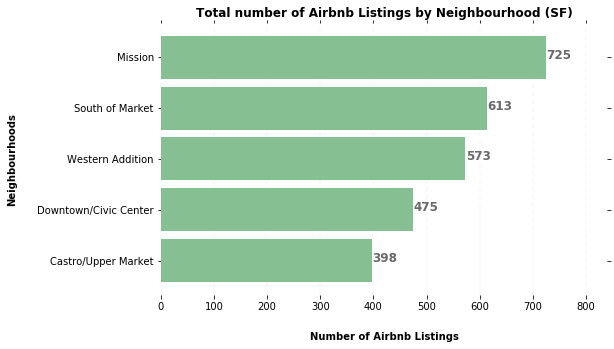

In [216]:
#SF_neighbourhoods.plot.bar()
#ax = top_SF_neighbourhoods.plot.bar(x='Number of Listings',y='Neighbourhoods')


ax = top_SF_neighbourhoods.plot(kind='barh', figsize=(8, 5), color= '#86bf91', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total number of Airbnb Listings by Neighbourhood (SF)",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()


for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.6, i.get_y()+.45, \
            str(i.get_width()), fontsize=12,fontweight='bold',
color='dimgrey')
    

plt.savefig("Total number of Airbnb Listings by Neighbourhood (SF).png")
plt.show()

In [217]:
#Get Top 5 Neighbourhoods
#Group Top 5 Neighbourhoods by Property Type
#Group Top 5 Neighbourhoods by Property Type and Price (Bins) - look at the quantiles (mean, medium) .quantile 


In [218]:
SF_property_type = SF_listing_df["Room Type"].value_counts()
SF_property_type = SF_property_type.reset_index()

SF_property_type = SF_property_type.rename(columns={'index':'Room Type',
                                                   'Room Type': 'Number of Listings'})
SF_property_type

,Room Type,Number of Listings
0,Entire home/apt,4366
1,Private room,2524
2,Shared room,182


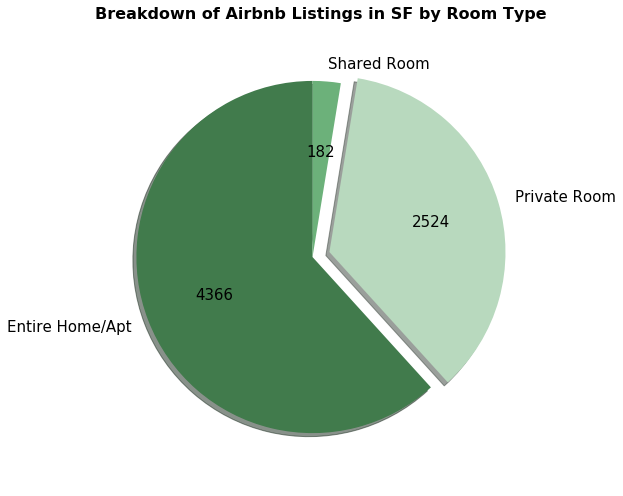

<Figure size 432x288 with 0 Axes>

In [219]:
#room type visualizations 

# matplotlib.style.use('ggplot')

# room = data_complete.room_type
# r = Counter(room)

# room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
# room_df.columns = ['Room Type']
# room_df.plot.pie(y = 'Room Type', 
#                  colormap = 'BuGn', 
#                  figsize=(7,9), 
#                  fontsize = 16, autopct = '%11.f%%',
#                  legend = False,
#                  title = 'SF Airbnb Rental Listings by Room Type')

#make title bold and bigger than the text labels
#make numbers % format
#Change color of the table to green-ish 
#Add legend


def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format


# Pie chart
labels = ['Entire Home/Apt','Private Room', 'Shared Room ']
sizes = [4366,2524, 182]

colors = ['#417b4c','#b8d9be','#6cb17a'] 

# only "explode" the 2nd slice 
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots(figsize=(8,7))

ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct = autopct_format(sizes),
        shadow=True, startangle=90,textprops={'fontsize': 15})

plt.title("Breakdown of Airbnb Listings in SF by Room Type",fontsize=16,fontweight='bold' )

# Equal aspect ratio ensures that pie is drawn as a circle

#plt.tight_layout(pad=5)
ax1.axis('equal')  
plt.tight_layout()
plt.margins(0.04)
plt.show()

plt.savefig("Breakdown of Airbnb Listings in NYC by Room Type.png")


In [220]:
#Breakdown of Room Types

roomProperty_df = SF_listing_df.groupby(['neighbourhood_cleansed','Room Type']).price.mean()
roomProperty_df = roomProperty_df.reset_index()
roomProperty_df = roomProperty_df.sort_values(by='price', ascending=[0])
roomProperty_df = roomProperty_df.rename(columns={"neighbourhood_cleansed": "Neighbourhood",
                                                 "room_type": "Room Type"})
roomProperty_df.head()

,Neighbourhood,Room Type,price
15,Diamond Heights,Entire home/apt,1160.600000
78,Russian Hill,Entire home/apt,456.966387
81,Seacliff,Entire home/apt,453.333333
76,Presidio Heights,Entire home/apt,433.136364
67,Pacific Heights,Entire home/apt,399.688073


In [221]:
# roomProperty_df = pd.DataFrame(roomProperty_df)
# roomProperty_df.head(5)

In [222]:
#SF_listing_df

In [223]:
SF_neighbourhood_total = len(SF_listing_df['neighbourhood_cleansed'].unique())
SF_neighbourhood_total

36

In [224]:
SF_neighbourhood_total = len(SF_listing_df['City'].unique())
SF_neighbourhood_total

8

In [225]:
SF_neighbourhood_price=SF_listing_df.groupby(['neighbourhood_cleansed']).mean()['price']
SF_neighbourhood_price.sort_values(ascending=False)

neighbourhood_cleansed
Diamond Heights          702.222222
Russian Hill             403.818182
Seacliff                 364.190476
Presidio Heights         355.413793
Pacific Heights          335.854305
Marina                   330.148718
Golden Gate Park         287.833333
Twin Peaks               265.482759
Western Addition         256.123909
Potrero Hill             246.432039
Noe Valley               237.547468
Financial District       237.424242
Castro/Upper Market      230.869347
Haight Ashbury           213.332298
Nob Hill                 212.274900
Mission                  211.311724
Inner Richmond           208.654206
Inner Sunset             205.928105
Glen Park                204.449275
North Beach              203.595890
Parkside                 196.836066
South of Market          192.869494
West of Twin Peaks       180.375000
Outer Richmond           180.179104
Bernal Heights           176.551451
Chinatown                176.085470
Downtown/Civic Center    170.835789
Outer

In [226]:
SF_neighbourhoods_grouped = SF_listing_df.groupby('neighbourhood_cleansed').agg({'price': ['mean', 'min','max']})
SF_neighbourhoods_grouped = SF_neighbourhoods_grouped.reset_index()

SF_neighbourhoods_grouped.head()
# #create a chart summarizing top 5 neighbourhoods of most listings

neighbourhood_cleansed       price              
                                mean   min     max
0                Bayview  141.213740  36.0  2200.0
1         Bernal Heights  176.551451   0.0  1000.0
2    Castro/Upper Market  230.869347  10.0  1450.0
3              Chinatown  176.085470  30.0   800.0
4         Crocker Amazon  111.477273  37.0   450.0

In [227]:
SF_neighbourhoods_grouped2 = SF_listing_df.groupby(['neighbourhood_cleansed','Room Type']).agg({'price': ['mean', 'min','max']})
SF_neighbourhoods_grouped2 = SF_neighbourhoods_grouped2.reset_index()

SF_neighbourhoods_grouped2.head()


neighbourhood_cleansed        Room Type       price              
                                                 mean   min     max
0                Bayview  Entire home/apt  179.913793  60.0   999.0
1                Bayview     Private room  111.027778  36.0  2200.0
2                Bayview      Shared room   70.000000  70.0    70.0
3         Bernal Heights  Entire home/apt  220.353191  63.0  1000.0
4         Bernal Heights     Private room  105.251748   0.0   325.0

In [228]:
SF_neighbourhoods_grouped2=pd.DataFrame(SF_neighbourhoods_grouped2)
SF_neighbourhoods_grouped2 = SF_neighbourhoods_grouped2.rename(columns={'neighbourhood_cleansed': 'Neighbourhood'})
SF_neighbourhoods_grouped2.head()

Neighbourhood        Room Type       price              
                                          mean   min     max
0         Bayview  Entire home/apt  179.913793  60.0   999.0
1         Bayview     Private room  111.027778  36.0  2200.0
2         Bayview      Shared room   70.000000  70.0    70.0
3  Bernal Heights  Entire home/apt  220.353191  63.0  1000.0
4  Bernal Heights     Private room  105.251748   0.0   325.0

In [229]:
SF_neighbourhoods_grouped2=SF_neighbourhoods_grouped2[(SF_neighbourhoods_grouped2 != 0).all(1)]
SF_neighbourhoods_grouped2.head()


Neighbourhood        Room Type       price              
                                          mean   min     max
0         Bayview  Entire home/apt  179.913793  60.0   999.0
1         Bayview     Private room  111.027778  36.0  2200.0
2         Bayview      Shared room   70.000000  70.0    70.0
3  Bernal Heights  Entire home/apt  220.353191  63.0  1000.0
5  Bernal Heights      Shared room   79.000000  79.0    79.0

In [230]:
#Popular Neighborhood By Listing Count
SF_mission_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Mission"].groupby(['Room Type'])['price'].mean()
SF_mission_neighbourhood

SF_SOMA_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "South of Market"].groupby(['Room Type'])['price'].mean()
SF_SOMA_neighbourhood

SF_western_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "Western Addition"].groupby(['Room Type'])['price'].mean()
SF_western_neighbourhood

SF_downtown_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "Downtown/Civic Center"].groupby(['Room Type'])['price'].mean()
SF_downtown_neighbourhood


SF_castro_neighbourhood  = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "Castro/Upper Market"].groupby(['Room Type'])['price'].mean()
SF_castro_neighbourhood

Room Type
Entire home/apt    283.247148
Private room       129.268657
Shared room         70.000000
Name: price, dtype: float64

In [231]:
# SF_top_neighbourhood_by_listings = pd.DataFrame({"Mission": SF_mission_neighbourhood,
#                                                 "Western Addition": SF_western_neighbourhood,
#                                                 "Castro/Upper Market": SF_castro_neighbourhood,
#                                                 "Haight Ashbury": SF_haight_neighbourhood,
#                                                 "Bernal Heights": SF_bernal_neighbourhood})
# SF_top_neighbourhood_by_listings


SF_top_neighbourhood_by_listings = pd.DataFrame({"Entire home/apt":[258.58, 209.79, 303.83,191.49,283.25],
                                                 "Private room":[136.74,143.93,161.20,150.81,129.27],
                                                 "Shared room": [45.20,146.31,67.00,84.40,70.00]},
                                                 index=["Mission","South of Market","Western Addition","Downtown/Civic Center",
                                                        "Castro/Upper Market"])

SF_top_neighbourhood_by_listings

,Entire home/apt,Private room,Shared room
Mission,258.58,136.74,45.20
South of Market,209.79,143.93,146.31
Western Addition,303.83,161.20,67.00
Downtown/Civic Center,191.49,150.81,84.40
Castro/Upper Market,283.25,129.27,70.00


In [232]:
#SF_top_neighbourhood_by_listings.fillna(0)
SF_top_neighbourhood_by_listings

,Entire home/apt,Private room,Shared room
Mission,258.58,136.74,45.20
South of Market,209.79,143.93,146.31
Western Addition,303.83,161.20,67.00
Downtown/Civic Center,191.49,150.81,84.40
Castro/Upper Market,283.25,129.27,70.00


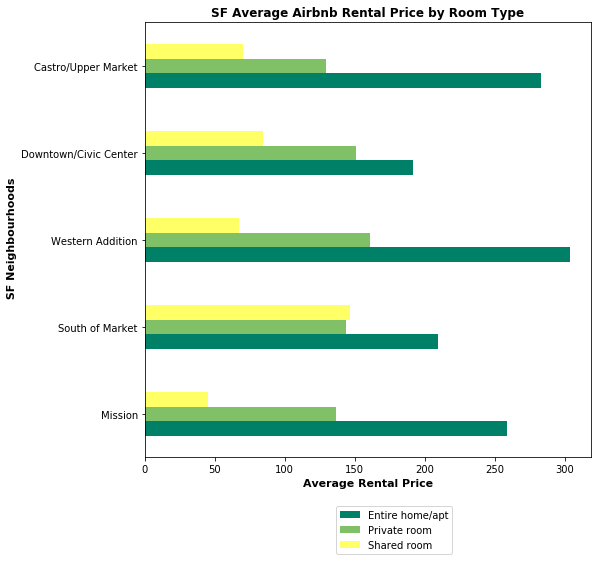

In [256]:
#where is the 5th city?

SF_top_neighbourhood_by_listings.plot(kind='barH', figsize=(8, 8), colormap='summer')

plt.title("SF Average Airbnb Rental Price by Room Type",fontsize=12, fontweight='bold' )
plt.xlabel("Average Rental Price", fontsize=11, fontweight='bold')
plt.ylabel(" SF Neighbourhoods", fontsize=11, fontweight='bold')
#plt.legend(labels=five_SF_neighbourhoods_df, loc='upper right')

lgd=plt.legend(bbox_to_anchor=(0.7,-.1), loc='best', ncol=1)


plt.savefig('SF Average Airbnb Rental Price by Room Type.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [234]:
#SF Neighborhood By the Highest Airbnb Average Rental Price
SF_pacific_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Pacific Heights"].mean()['price']
SF_pacific_by_price

SF_Russian_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Russian Hill"].mean()['price']
SF_Russian_by_price

SF_Diamond_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Diamond Heights"].mean()['price']
SF_Diamond_by_price

SF_Seacliff_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Seacliff"].mean()['price']

SF_presidio_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "Presidio Heights"].mean()['price']
SF_presidio_by_price


355.41379310344826

In [235]:
SF_neighbourhood_by_highest_price = pd.DataFrame({"Average Rental Price":[335.85,403.81,702.22,364.19,355.41]},
                                                 index=["Pacific Heights","Russian Hill","Diamond Heights",
                                                        "Seacliff","Presidio Heights"])
SF_neighbourhood_by_highest_price



,Average Rental Price
Pacific Heights,335.85
Russian Hill,403.81
Diamond Heights,702.22
Seacliff,364.19
Presidio Heights,355.41


In [236]:
#SF_neighbourhood_by_high_price.fillna(0)

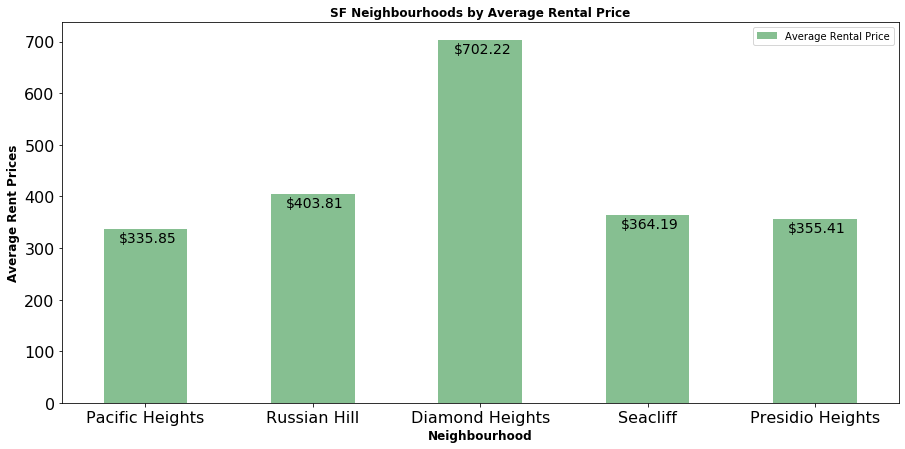

In [239]:
ax = SF_neighbourhood_by_highest_price.plot.bar(rot=0, figsize=(15,7), fontsize=16, color='#86bf91')

plt.title("SF Neighbourhoods by Average Rental Price",fontsize=12, fontweight='bold' )
plt.xlabel("Neighbourhood", fontsize=12, fontweight='bold')
plt.ylabel("Average Rent Prices", fontsize=12, fontweight='bold')

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    
    ax.text(i.get_x()+0.09, i.get_height()-25, \
            '$'+ str(i.get_height()), fontsize=14,
                color='black')

    
plt.savefig("SF Neigbhourhoods by Highest Average Rental Price.png")
#plt.legend(labels=five_SF_neighbourhoods_df, loc='upper right')
#Add text labels, make chart green

In [40]:
# SF_Soma_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="South of Market"].groupby(['Room Type'])['price'].mean()
# SF_Soma_neighbourhood

Room Type
Entire home/apt     254.390244
Private room        132.000000
Shared room        1283.000000
Name: price, dtype: float64